# 1. Load Data and import libraries


## Import libraries

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(42)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Initial batch size, number of epochs and learning rate

In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [ ]:
train_dataset = FashionMNIST ('./data', train = True, download= True, transform= transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle= True)
test_dataset = FashionMNIST ('./data', train = False, download= True, transform= transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

# 2a. Weight Increasing (Std= 1)

## Model Initialization


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=1.0)
                nn.init.constant_(m.bias, 0.0)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)

        return out

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Training

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
  model.train()
  t_loss = 0
  t_acc = 0
  cnt = 0
  for X, y in train_loader:
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion (outputs, y)
    loss.backward()
    optimizer.step()
    t_loss += loss.item()
    t_acc += (torch.argmax(outputs, 1) == y).sum().item()
    cnt += len (y)
  t_loss /= len (train_loader)
  train_losses.append(t_loss)
  t_acc /= cnt
  train_acc.append(t_acc)

  model.eval ()
  v_loss = 0
  v_acc = 0
  cnt  = 0
  with torch.no_grad():
    for X, y in test_loader:
      X, y = X.to(device), y.to(device)
      outputs = model(X)
      loss = criterion (outputs, y)
      v_loss += loss.item()
      v_acc += (torch.argmax(outputs, 1) == y).sum().item()
      cnt += len(y)
  v_loss /= len (test_loader)
  val_losses.append(v_loss)
  v_acc /= cnt
  val_acc.append(v_acc)
  print (f"Epoch {epoch + 1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Validation Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 1.7661, Train_Acc: 0.3912, Validation Loss: 1.6690, Validation Acc: 0.4209
Epoch 2/300, Train_Loss: 1.5695, Train_Acc: 0.4501, Validation Loss: 1.5155, Validation Acc: 0.4687
Epoch 3/300, Train_Loss: 1.4412, Train_Acc: 0.4925, Validation Loss: 1.4085, Validation Acc: 0.5055
Epoch 4/300, Train_Loss: 1.3478, Train_Acc: 0.5219, Validation Loss: 1.3277, Validation Acc: 0.5302
Epoch 5/300, Train_Loss: 1.2757, Train_Acc: 0.5438, Validation Loss: 1.2670, Validation Acc: 0.5509
Epoch 6/300, Train_Loss: 1.2216, Train_Acc: 0.5628, Validation Loss: 1.2177, Validation Acc: 0.5660
Epoch 7/300, Train_Loss: 1.1760, Train_Acc: 0.5763, Validation Loss: 1.1788, Validation Acc: 0.5781
Epoch 8/300, Train_Loss: 1.1397, Train_Acc: 0.5879, Validation Loss: 1.1472, Validation Acc: 0.5875
Epoch 9/300, Train_Loss: 1.1108, Train_Acc: 0.5985, Validation Loss: 1.1203, Validation Acc: 0.5957
Epoch 10/300, Train_Loss: 1.0850, Train_Acc: 0.6066, Validation Loss: 1.0956, Validation Acc: 0.6073

## Visualization

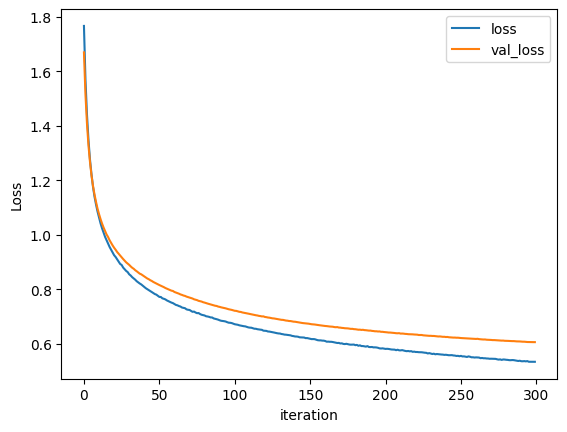

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

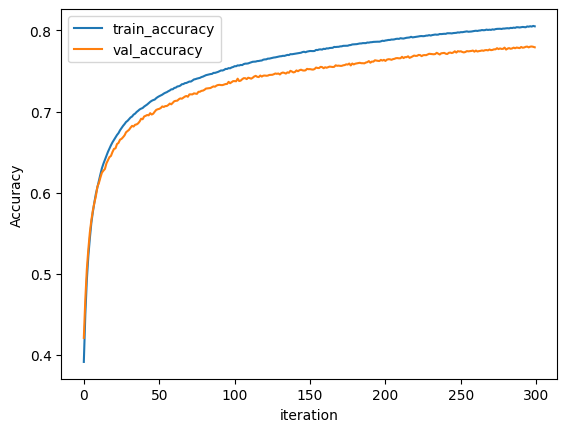

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

# 2b. Weight Increasing (std=10)

## Model Initialization

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=10.0)
                nn.init.constant_(m.bias, 0.0)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)

        return out

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

## Training

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 117.2608, Train_Acc: 0.1041, Validation Loss: 101.0736, Val_Acc: 0.1084
Epoch 2/300, Train_Loss: 88.2682, Train_Acc: 0.1020, Validation Loss: 81.7974, Val_Acc: 0.1014
Epoch 3/300, Train_Loss: 73.2449, Train_Acc: 0.1083, Validation Loss: 68.3729, Val_Acc: 0.0985
Epoch 4/300, Train_Loss: 68.5224, Train_Acc: 0.0877, Validation Loss: 59.8256, Val_Acc: 0.1025
Epoch 5/300, Train_Loss: 54.5613, Train_Acc: 0.0958, Validation Loss: 48.5924, Val_Acc: 0.1082
Epoch 6/300, Train_Loss: 43.4874, Train_Acc: 0.1138, Validation Loss: 41.7758, Val_Acc: 0.1158
Epoch 7/300, Train_Loss: 35.7552, Train_Acc: 0.1180, Validation Loss: 37.4753, Val_Acc: 0.1313
Epoch 8/300, Train_Loss: 32.7269, Train_Acc: 0.1203, Validation Loss: 33.4179, Val_Acc: 0.1268
Epoch 9/300, Train_Loss: 29.6483, Train_Acc: 0.1174, Validation Loss: 27.2065, Val_Acc: 0.1312
Epoch 10/300, Train_Loss: 25.8866, Train_Acc: 0.1389, Validation Loss: 26.5605, Val_Acc: 0.1705
Epoch 11/300, Train_Loss: 21.3465, Train_Acc: 0

## Training visualization


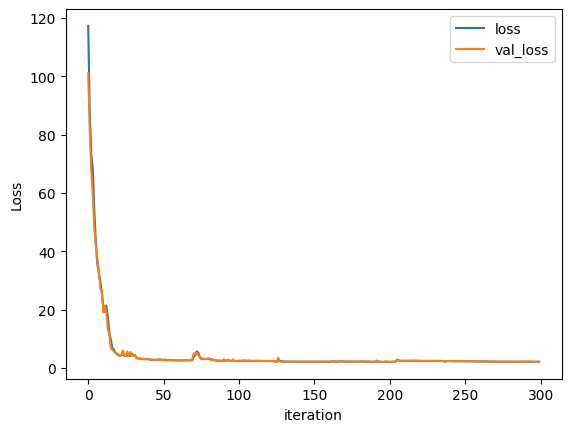

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

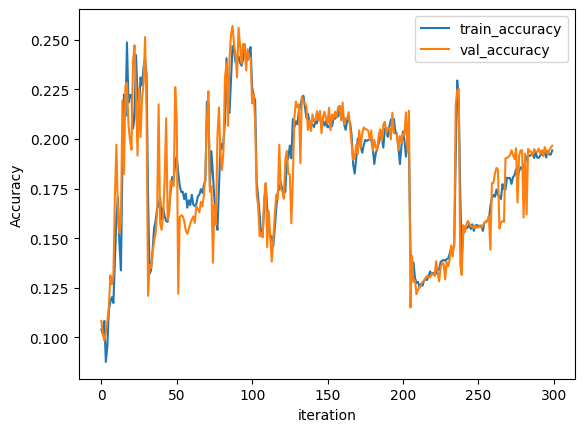

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

# 3. Better Activation

In [ ]:
class MLP_ReLU(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP_ReLU, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.05)
                nn.init.constant_(m.bias, 0.0)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        x = nn.ReLU()(x)
        x = self.layer4(x)
        x = nn.ReLU()(x)
        x = self.layer5(x)
        x = nn.ReLU()(x)
        x = self.layer6(x)
        x = nn.ReLU()(x)
        x = self.layer7(x)
        x = nn.ReLU()(x)
        out = self.output(x)

        return out

In [ ]:
model_MLP_ReLU = MLP_ReLU(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_MLP_ReLU.parameters(), lr=lr)

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model_MLP_ReLU.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model_MLP_ReLU(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model_MLP_ReLU.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model_MLP_ReLU(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 2.3022, Train_Acc: 0.1960, Validation Loss: 2.3020, Val_Acc: 0.1671
Epoch 2/300, Train_Loss: 2.3019, Train_Acc: 0.2354, Validation Loss: 2.3017, Val_Acc: 0.1931
Epoch 3/300, Train_Loss: 2.3016, Train_Acc: 0.2283, Validation Loss: 2.3015, Val_Acc: 0.2545
Epoch 4/300, Train_Loss: 2.3014, Train_Acc: 0.2757, Validation Loss: 2.3013, Val_Acc: 0.2978
Epoch 5/300, Train_Loss: 2.3012, Train_Acc: 0.3364, Validation Loss: 2.3011, Val_Acc: 0.3136
Epoch 6/300, Train_Loss: 2.3010, Train_Acc: 0.2730, Validation Loss: 2.3009, Val_Acc: 0.3728
Epoch 7/300, Train_Loss: 2.3008, Train_Acc: 0.3742, Validation Loss: 2.3006, Val_Acc: 0.3742
Epoch 8/300, Train_Loss: 2.3005, Train_Acc: 0.3520, Validation Loss: 2.3003, Val_Acc: 0.4010
Epoch 9/300, Train_Loss: 2.3002, Train_Acc: 0.4085, Validation Loss: 2.3000, Val_Acc: 0.4283
Epoch 10/300, Train_Loss: 2.2999, Train_Acc: 0.4286, Validation Loss: 2.2997, Val_Acc: 0.3902
Epoch 11/300, Train_Loss: 2.2995, Train_Acc: 0.4038, Validation Loss:

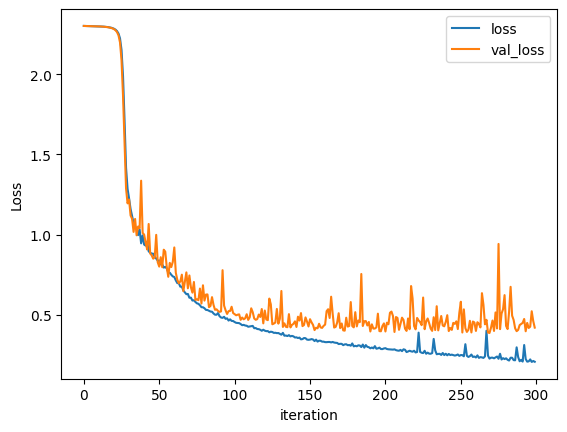

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

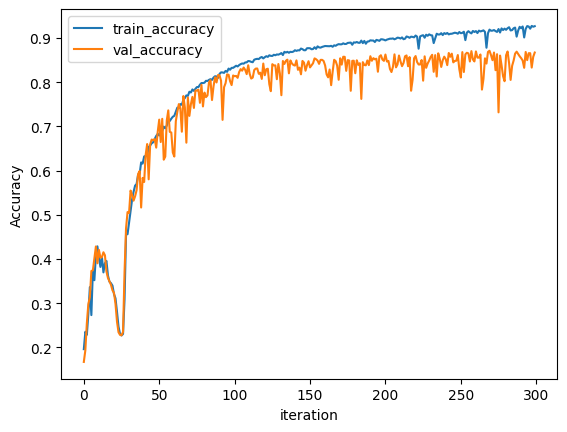

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

# 4. Normalization

## 4a. Normalization inside network

In [ ]:
class MLP_Normal_Inside (nn.Module):
  def __init__ (self, input_dims, hidden_dims, output_dims):
    super (MLP_Normal_Inside, self).__init__()
    self.hidden_dims = hidden_dims

    # Input Layer
    self.layer1 = nn.Linear(input_dims, hidden_dims)

    # Hidden Layers
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.layer6 = nn.Linear(hidden_dims, hidden_dims)
    self.layer7 = nn.Linear(hidden_dims, hidden_dims)

    # Output Layer
    self.output = nn.Linear (hidden_dims, output_dims)

    # Weight + Bias Initialization
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std= 0.05)
        nn.init.constant_(m.bias, 0.0)

    # Feedforward
  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer2(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer3(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer4(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer5(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer6(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)
    x = nn.Flatten()(x)
    x = self.layer7(x)
    x = nn.BatchNorm1d(self.hidden_dims, device=device)(x) # Batch Normalization
    x = nn.Sigmoid()(x)

    out = self.output(x)

    return out

In [ ]:
Model_MLP_Normal_Inside = MLP_Normal_Inside(input_dims = 784, hidden_dims= 128, output_dims= 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model_MLP_Normal_Inside.parameters(), lr=lr)

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    Model_MLP_Normal_Inside.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = Model_MLP_Normal_Inside(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    Model_MLP_Normal_Inside.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = Model_MLP_Normal_Inside(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 1.9052, Train_Acc: 0.5581, Validation Loss: 1.6440, Val_Acc: 0.7006
Epoch 2/300, Train_Loss: 1.4933, Train_Acc: 0.7221, Validation Loss: 1.3724, Val_Acc: 0.7314
Epoch 3/300, Train_Loss: 1.2748, Train_Acc: 0.7462, Validation Loss: 1.1957, Val_Acc: 0.7520
Epoch 4/300, Train_Loss: 1.1218, Train_Acc: 0.7657, Validation Loss: 1.0669, Val_Acc: 0.7671
Epoch 5/300, Train_Loss: 1.0074, Train_Acc: 0.7797, Validation Loss: 0.9686, Val_Acc: 0.7796
Epoch 6/300, Train_Loss: 0.9190, Train_Acc: 0.7914, Validation Loss: 0.8918, Val_Acc: 0.7910
Epoch 7/300, Train_Loss: 0.8477, Train_Acc: 0.8002, Validation Loss: 0.8292, Val_Acc: 0.7992
Epoch 8/300, Train_Loss: 0.7908, Train_Acc: 0.8078, Validation Loss: 0.7784, Val_Acc: 0.8034
Epoch 9/300, Train_Loss: 0.7426, Train_Acc: 0.8137, Validation Loss: 0.7359, Val_Acc: 0.8083
Epoch 10/300, Train_Loss: 0.7038, Train_Acc: 0.8200, Validation Loss: 0.7019, Val_Acc: 0.8122
Epoch 11/300, Train_Loss: 0.6686, Train_Acc: 0.8239, Validation Loss:

## 4b. Custom Layer Norm


In [ ]:
class MyNormalization(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        mean = torch.mean(x)
        std  = torch.std(x)
        return (x - mean) / std

In [ ]:
class MLP_Normal_Inside_Custom(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP_Normal_Inside_Custom, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.05)
                nn.init.constant_(m.bias, 0.0)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer4(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer5(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = MyNormalization()(x)
        x = nn.Sigmoid()(x)
        out = self.output(x)

        return out

In [ ]:
model_MLP_Normal_Inside_Custom = MLP_Normal_Inside_Custom(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_MLP_Normal_Inside_Custom.parameters(), lr=lr)

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model_MLP_Normal_Inside_Custom.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model_MLP_Normal_Inside_Custom(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model_MLP_Normal_Inside_Custom.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model_MLP_Normal_Inside_Custom(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 2.3065, Train_Acc: 0.0998, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 2/300, Train_Loss: 2.3029, Train_Acc: 0.1017, Validation Loss: 2.3030, Val_Acc: 0.1000
Epoch 3/300, Train_Loss: 2.3030, Train_Acc: 0.0985, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 4/300, Train_Loss: 2.3028, Train_Acc: 0.0985, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 5/300, Train_Loss: 2.3029, Train_Acc: 0.0983, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.3029, Train_Acc: 0.0988, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.3028, Train_Acc: 0.1014, Validation Loss: 2.3031, Val_Acc: 0.1000
Epoch 8/300, Train_Loss: 2.3029, Train_Acc: 0.0974, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 9/300, Train_Loss: 2.3028, Train_Acc: 0.0974, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 10/300, Train_Loss: 2.3029, Train_Acc: 0.0980, Validation Loss: 2.3029, Val_Acc: 0.1000
Epoch 11/300, Train_Loss: 2.3028, Train_Acc: 0.0976, Validation Loss:

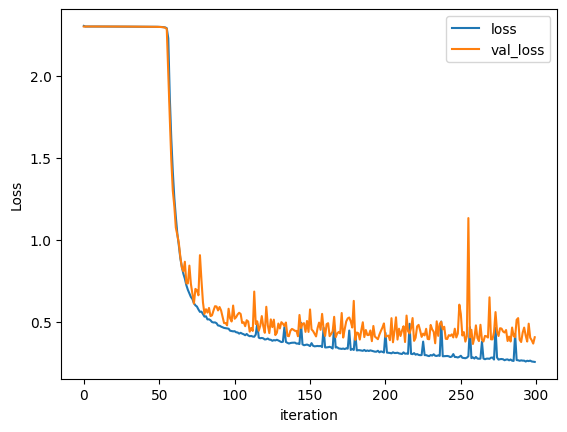

In [ ]:
plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

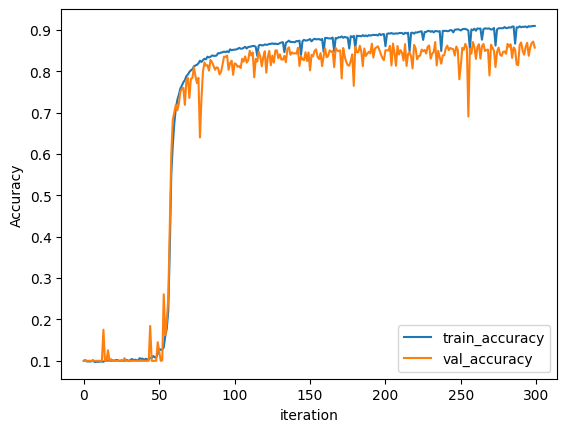

In [ ]:
plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

# 5. Skip Connection

In [ ]:
class MLP_Skip_Connection(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP_Skip_Connection, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0.0, std=0.05)
                nn.init.constant_(m.bias, 0.0)


    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        skip = x
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = skip + x
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        skip = x
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        x = skip + x
        out = self.output(x)

        return out

In [ ]:
model_MLP_Skip_Connection = MLP_Skip_Connection(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_MLP_Skip_Connection.parameters(), lr=lr)

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []

for epoch in range(num_epochs):
    model_MLP_Skip_Connection.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model_MLP_Skip_Connection(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model_MLP_Skip_Connection.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model_MLP_Skip_Connection(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/300, Train_Loss: 2.3062, Train_Acc: 0.1079, Validation Loss: 2.3007, Val_Acc: 0.1009
Epoch 2/300, Train_Loss: 2.2994, Train_Acc: 0.1216, Validation Loss: 2.2988, Val_Acc: 0.1906
Epoch 3/300, Train_Loss: 2.2966, Train_Acc: 0.1433, Validation Loss: 2.2951, Val_Acc: 0.1028
Epoch 4/300, Train_Loss: 2.2933, Train_Acc: 0.1566, Validation Loss: 2.2927, Val_Acc: 0.1803
Epoch 5/300, Train_Loss: 2.2902, Train_Acc: 0.1666, Validation Loss: 2.2887, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.2866, Train_Acc: 0.1752, Validation Loss: 2.2859, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.2828, Train_Acc: 0.2201, Validation Loss: 2.2836, Val_Acc: 0.2279
Epoch 8/300, Train_Loss: 2.2787, Train_Acc: 0.2430, Validation Loss: 2.2767, Val_Acc: 0.1012
Epoch 9/300, Train_Loss: 2.2738, Train_Acc: 0.2585, Validation Loss: 2.2724, Val_Acc: 0.2673
Epoch 10/300, Train_Loss: 2.2685, Train_Acc: 0.2778, Validation Loss: 2.2673, Val_Acc: 0.2008
Epoch 11/300, Train_Loss: 2.2624, Train_Acc: 0.3169, Validation Loss:

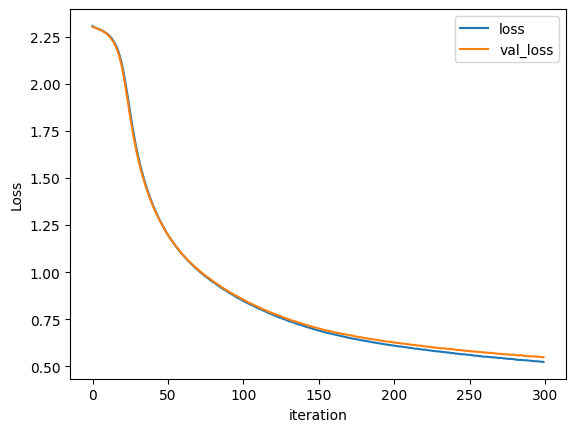

In [ ]:
 plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

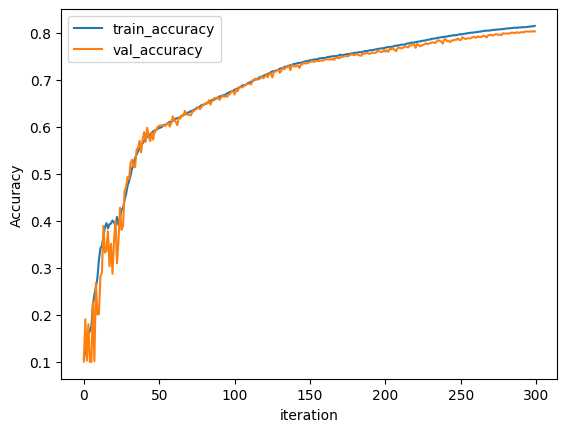

In [ ]:
plt.plot(train_acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()